<a href="https://colab.research.google.com/github/luckycontrol/DeepLearning_tensorflow/blob/main/05_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# 나쁜 미분의 구현
# 함수 f(x)에서, x가 아주 작은 수인 h만큼 변경되었을 때의 변화량을 구하는 것.
# h에 대한 평균변화량
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

In [ ]:
print(np.float32(1e-50)) # 너무 작아서 컴퓨터가 0으로 표현함.

0.0


In [ ]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)


In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

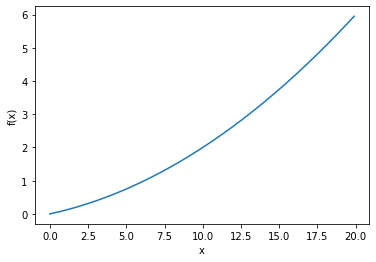

In [ ]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열을 생성
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

# 편미분

$$ f(x_0, x_1) = x_0^2 + x_1^2 $$

In [ ]:
# x0 = 3, x1 = 4 일 때 함수 f에 대한 x0의 편미분을 구하기
# x1을 4로 대입했을 때의 x0의 미분값을 구하는 것과 동일하다.

def func_1(x0):
  return x0 ** 2 + 4.0 ** 2

print(numerical_diff(func_1, 3.0))

6.00000000000378


In [ ]:
def func_2(x1):
  return 7.0 ** 2 + x1 ** 2

print(numerical_diff(func_2, 3.0))

5.9999999999860165


기울기 벡터 알아보기

- 각 변수의 방향으로 어떻게 이동해야할지 구한다.

In [ ]:
def numerical_gradient(f, x): # 편미분값을 구하기.
  h = 1e-4
  # 기울기 벡터를 저장할 배열 생성하기 ( 변수의 갯수만큼 원소를 가질 수 있도록 )
  grad = np.zeros_like(x) # x 배열의 크기 만큼 0으로 채워진 배열 만들기.

  # 각 변수에 대한 미분값 구하기
  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    # 각 편미분의 기울기 저장
    # ex) x0에 대한 편미분을 구하고 해당 기울기를 해당 인덱스에 저장
    #     x1에 대한 편미분을 구하고 해당 기울기를 해당 인덱스에 저장
    grad[idx] = (fxh1 - fxh2) / 2 * h

    # 원래값 복구
    x[idx] = tmp_val

  return grad

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

In [ ]:
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([0.0, 2.0]))
print("x = [0, 2] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([3.0, 0.0]))
print("x = [3, 0] 일 때의 기울기 배열 : {}".format(result))

x = [3, 4] 일 때의 기울기 배열 : [6.e-08 8.e-08]
x = [0, 2] 일 때의 기울기 배열 : [0.e+00 4.e-08]
x = [3, 0] 일 때의 기울기 배열 : [6.e-08 0.e+00]


경사하강법 구현하기

In [ ]:
'''
  f : 대상함수
  init_x : 시작지점
  lr : 0.01
  step_num : 학습 횟수 ( 경사하강법을 진행할 횟수 )
'''

def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    # 각 변수마다 x에서의 기울기를 구한다.
    grad = numerical_gradient(f, x)

    # 경사하강법을 이용해서 x를 업데이트.
    x -= lr * grad

  return x

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
  
  for idx in range(x.size):
      tmp_val = x[idx]
      
      # f(x+h) 계산
      x[idx] = float(tmp_val) + h
      fxh1 = f(x)
      
      # f(x-h) 계산
      x[idx] = tmp_val - h 
      fxh2 = f(x) 
      
      grad[idx] = (fxh1 - fxh2) / (2*h)
      x[idx] = tmp_val # 값 복원
      
  return grad

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print("최솟값 탐색 결과 : {}".format(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)[0]))

최솟값 탐색 결과 : -6.111107928998789e-10


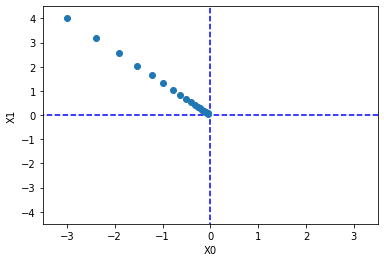

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률에 대한 결과 확인하기

In [ ]:
init_x = np.array([-3.0, 4.0])

result, _ = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print("학습률이 10.0 일 때 : {}".format(result)) # 발산

학습률이 10.0 일 때 : [-2.58983747e+13 -1.29524862e+12]


학습률이 너무 크면 최소지점을 찾지 못하고 발산한다.

In [ ]:
init_x = np.array([-3.0, 4.0])

result, _ = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print("학습률이 1e-10 일 때 : {}".format(result)) # 발산

학습률이 1e-10 일 때 : [-2.99999994  3.99999992]


학습률이 너무 작으면 값의 갱신이 거의 이루어지지 않는다.

학습률의 기본값은 거의 0.01을 놓고 사용한다.

In [37]:
%cd common
!unzip common.zip

/content/common
Archive:  common.zip
  inflating: functions.py            
  inflating: gradient.py             
  inflating: layers.py               
  inflating: multi_layer_net.py      
  inflating: multi_layer_net_extend.py  
  inflating: optimizer.py            
  inflating: trainer.py              
  inflating: util.py                 
 extracting: __init__.py             


In [38]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [39]:
class SimpleNet:
  def __init__(self):
    # 신경망의 초기화 과정
    # 최초의 가중치와 편향을 가져야 한다.
    #   1) 정규분포 랜덤 * 0.01 ( 일반적인 케이스 )
    #   2) 카이밍 히 초깃값 ( He 초깃값 )
    #   3) 사비에르 초깃값 ( Xavier 초깃값 )

    self.W = np.random.randn(2, 3) # 가중치를 랜덤하게 정규분포로 초기화 한다.

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t): # x : 문제, t: target ( 정답 )
    z = self.predict(x)
    y = softmax(z) # 출력값 구하기

    loss = cross_entropy_error(y, t) # Loss값 구하기. 예측값과 실제값을 동시에 넣는다.

    return loss

In [40]:
net = SimpleNet()
print("가중치: {}".format(net.W))

가중치: [[-0.46774027  1.54223028  0.29455937]
 [-0.11962938  2.63199857 -1.50308804]]


In [41]:
x = np.array([0.6, 0.9])
p = net.predict(x)

print("예측값: {}".format(p))

예측값: [-0.38831061  3.29413688 -1.17604362]


In [42]:
print("최댓값의 인덱스: {}".format(np.argmax(p))) # 최댓값의 인덱스 확인

최댓값의 인덱스: 1


In [46]:
t = np.array([1, 0, 0]) # 정답이 0번 인덱스 일 때
t_error = np.array([0, 0, 1]) # # 정답이 2번 인덱스 일 때

print("정답이 0번 인덱스 일 때: {}".format(net.loss(x, t)))
print("정답이 2번 인덱스 일 때: {}".format(net.loss(x, t_error)))

정답이 0번 인덱스 일 때: 3.7183958276982154
정답이 2번 인덱스 일 때: 4.506123900961175


In [47]:
t = np.array([0, 0, 1]) # # 정답이 2번 인덱스 일 때 

def f(W):
  return net.loss(x, t)

In [48]:
dW = numerical_gradient(f, net.W) # Loss를 구하는 함수 f에 대한 모든 W의 기울기 구하기
print(dW)

[[ 0.01456353  0.57880645 -0.59336998]
 [ 0.0218453   0.86820967 -0.89005497]]


* $ W_{11}$ 이 h만큼 증가하면 Loss가 0.01만큼 증가한다.
* $ W_{31}$ 이 h만큼 증가하면 Loss가 0.6만큼 감소한다.

# MNIST 신경망 구현하기

In [49]:
import sys, os
sys.path.append(os.pardir)

from common.functions import *
from common.gradient import numerical_gradient

In [54]:
'''
TwoLayerNet : 2층 짜리 신경망 - 은닉층 1개, 출력층 1개
  - 마음대로 Hidden Unit, Output Size를 조절할 수 있게 만들 것.
'''

class TwoLayerNet:
  # 초기화 시 필요한 것
  #   1. 입력 데이터. x의 size : n개의 입력을 받아서 w의 갯수를 파악해야 하기 때문에.
  #       - mnist의 경우 28x28개의 입력을 받는다.

  #   2. hidden unit의 크기
  #   3. output size
  #   4. 가중치 정규분포 초기화 값 ( 정규분포 랜덤값에 곱할 값 ) - 0.01을 곱하는 것으로 알려져 있다..
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}

    # 1층 매개변수 마련하기
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)

    # 2층(출력층) 매개변수 마련하기
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2, b1, b2 = self.params['W1'], self.params['W2'], self.params['b1'], self.params['b2']

    # 1층 계산
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # 2층 계산
    z2 = np.dot(a1, W2) + b2
    y = softmax(z2)

    return y

  def loss(self, x, t):
    # Loss를 구하기 위해서는 예측부터 한다. - 예측값과 타겟값을 이용해서 얼마나 차이나는지 구한다.
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)

    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])

    return accuracy

  def numerical_gradient(self, x, t):
    # 신경망의 모든 매개변수의 미분값(기울기) 구하기 - 수치미분 활용.
    print("미분 시작")

    loss_W = lambda W: self.loss(x, t)

    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    grads = {}

    # 1층 매개변수의 기울기 구하기 ( Loss에 대한 W1, b1의 기울기를 구한다. )
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])

    # 2층 매개변수의 기울기 구하기 ( Loss에 대한 W2, b2의 기울기 )
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads


In [55]:
# 신경망 생성하기
input_size = 28 * 28
hidden_size = 100
output_size = 10

net = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [56]:
net.params['W1'].shape, net.params['W2'].shape

((784, 100), (100, 10))

총 매개변수의 개수는 ?

(784 * 100 + 100) + (100 * 10 + 10)

총 미분횟수 : 60000 * 79510 => 약 49억번..  
너무 많다. 따라서 역전파를 이용해야 한다.

In [60]:
# 신경망이 잘 돌아가는지 임의의 데이터를 집어 넣어서 테스트 해보기
x = np.random.rand(100, 784) # 이미지 100장 미니매치를 임의로 만듦
y = net.predict(x)

In [61]:
x.shape, y.shape

((100, 784), (100, 10))

# MNIST 데이터셋 불러와서 훈련 시키기

In [63]:
from tensorflow.keras import datasets

mnist = datasets.mnist

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [67]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [68]:
input_size = 28 * 28
hidden_size = 100
output_size = 10

network = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# 데이터 전처리

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
y_train = OneHotEncoder().fit_transform(y_train)
y_train = y_train.toarray()

x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [71]:
y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

In [72]:
y_test_dummy.shape

(10000, 10)

In [73]:
x_train = x_train / 255.0 # 정규화
x_train.shape

(60000, 784)

In [76]:
x_test = x_test.reshape(x_test.shape[0], -1)
x_test = x_test / 255.0
x_test.shape

(10000, 784)

# 훈련

* 미니 배치 선정
* 반복 횟수 설정
* 학습률 설정

In [80]:
from tqdm import tqdm_notebook # 작업이 끝날 예상시간을 알려줌

# 반복횟수
iter_nums = 10000

# 미니배치 설정
train_size = x_train.shape[0]
batch_size = 100

# 학습률
learning_rate = 0.1

network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

# 반복하고
# 배치 만들고
# 기울기 구하고
# Loss 구하고

for i in tqdm_notebook(range(iter_nums)):
  # 미니 배치 인덱스 선정
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 각 배치 마다의 기울기를 계산
  # network의 numerical_gradient에서 하는 일
  #   1. 예측
  #   2. cross_entropy_error를 이용한 Loss 구하기
  #   3. 구해신 Loss값을 이용해 미분을 수행해서 각 층의 매개변수 기울기를 저장

  grads = network.numerical_gradient(x_batch, t_batch)

  for key in grads.keys():
    network.params[key] -= learning_rate * grads[key]

  # 갱신된 Loss 확인하기
  loss = network.loss(x_batch, t_batch)
  print("Step {} -> Loss : {}".format(i, loss))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


미분 시작
Step 0 -> Loss : 2.285687041052608
미분 시작


KeyboardInterrupt: ignored